## Creating Data: Compute Measures for California and Texas Aplications Data

from White Flight in Higher Education? The Case of Hispanic-Serving Institutions

by Laura Hamilton, Charlie Eaton, and Simon Cheng

In [2]:
quietly {

use hdef19802019, clear
    
keep tef* unitid year cpop* pop* control iclevel
**Create separate unitid for Benjamin Franklin Institute for when it goes from Public to Private
    **Correct IPEDS reporting error to note it is private in 2016 & 2017
replace unitid=unitid+1000000 if unitid==165884 & year>2007
    replace control=2 if unitid==1165884
       drop if year<2000 
*replace Boricuo college Latinx enrollment as missing for years 1993 & 1994
    * when reporting error reduced % Latinx from 95% to 0%
replace tefhispt=. if unitid==189413 & year<1995 & year>1992
    
*keep if ftfeftotlt>100 & ftfeftotlt<. & control==1
    keep if control==1
    
foreach var in efbkaat efhispt efwhitt efaiant efasiat {
quietly    gen pctt`var'= t`var' / teftotlt * 100
quietly gen lnftf`var'=log(ftf`var')
    quietly gen lnt`var'=log(t`var')
}
foreach var in cpopam cpopas cpopbl cpopwh cpophi populationam populationas populationbl populationhi populationwh {
    replace `var'=0 if `var'==.
        gen ln`var'=log(`var'+1)
    }

quietly gen lnftfeftotlt=log(ftfeftotlt)

quietly gen hispserve=0 if pcttefhispt!=.
quietly replace hispserve=1 if pcttefhispt>=25 & pcttefhispt<.

xtset unitid year

**create var for year in which event occurs observation year of event for subject**
by unitid: gen transition=year if hispserv==1 & l.hispserv==0

**create var for year in which event occurs in all observations for all years for subject**
by unitid: egen hispserveyear = min(transition)

**generate a var for the number of years relative to the year of the event (e.g. + or - 2 years)

    
    /*
gen hispserveyeardiff= year-hispserveyear
    
    gen afteryrs=0
replace afteryrs=hispserveyeardiff if hispserveyeardiff>0 & hispserveyeardiff<.
gen beforeyrs=0
replace beforeyrs=hispserveyeardiff if hispserveyeardiff<0
gen beforeafteryrs=0
replace beforeafteryrs=hispserveyeardiff if hispserveyeardiff!=.
    
gen switchers = (hispserveyeardiff<.)
    label var beforeyrs "before years"
    label var afteryrs "after years"
    label var beforeafteryrs "before and after years"
    label var lnftfefwhitt "white"
    */
}

ftfefbkaat not found
r(111);


In [ ]:
merge 1:1 unitid year using csu_admissions_2000_2020.dta, gen(csuadmit) 

In [5]:
merge 1:1 unitid year using data/uc_admissions_2000_2020.dta, gen(ucadmit) update replace
keep if year>1999 & year<2020


(variable Asian_app was int, now long to accommodate using data's values)
(variable tot_admit was int, now long to accommodate using data's values)

    Result                      Number of obs
    -----------------------------------------
    Not matched                        14,438
        from master                    14,381  (ucadmit==1)
        from using                         57  (ucadmit==2)

    Matched                               175
        not updated                         0  (ucadmit==3)
        missing updated                   175  (ucadmit==4)
        nonmissing conflict                 0  (ucadmit==5)
    -----------------------------------------

(80 observations deleted)


In [8]:
merge 1:1 unitid year using data/texas_unitid_2000_2020.dta, gen(texasadmit) update replace

(variable AfricanAm_app was int, now double to accommodate using data's
       values)
(variable White_app was int, now long to accommodate using data's values)
(variable AfricanAm_admit was int, now float to accommodate using data's
       values)
(variable AmInd_enroll was byte, now int to accommodate using data's values)
(variable tot_enroll was int, now long to accommodate using data's values)
(variable AfricanAm_enroll was int, now float to accommodate using data's
       values)
(label _merge already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                        13,928
        from master                    13,875  (texasadmit==1)
        from using                         53  (texasadmit==2)

    Matched                               658
        not updated                         0  (texasadmit==3)
        missing updated                   658  (texasadmit==4)
        nonmissing conflict              

In [9]:
qui replace tot_app=tot_apply if tot_app==.
qui replace Internat_app=NonResAl_app if Internat_app==. 
qui replace Internat_app=0 if White_app!=. & Internat_app==.
qui gen nonwhite_app=.
replace nonwhite_app=tot_app-White_app-Internat_app if tot_app!=.

In [12]:
foreach var in White_ nonwhite_ tot_ {
  qui  gen ln`var'app=ln(`var'app) 
} 

drop if lnWhite_app==. & lnnonwhite_app==.

In [13]:
drop if lnWhite_app==. & lnnonwhite_app==.

(13,251 observations deleted)


In [14]:
save d_hsi_ca_tx_applications, replace

(file data/hsi_ca_tx_applications.dta not found)
file data/hsi_ca_tx_applications.dta saved


In [16]:
ds, alpha

AfricanAm_~t  PacIsland_~p  duns          lnftfefhispt  populationbl
AfricanAm_~p  PacIsland_~l  fice          lnftfeftotlt  populationhi
AfricanAm_~l  TwoMore_ad~t  fips          lnftfefwhitt  populationwh
AmInd_admit   TwoMore_app   ftfef2mort    lnnonwhite~p  segment
AmInd_app     TwoMore_en~l  ftfefaiant    lnpopulati~m  switchers
AmInd_enroll  Unknown_ad~t  ftfefasiat    lnpopulati~s  tef2mort
Asian_admit   Unknown_app   ftfefbkaat    lnpopulati~l  tefaiant
Asian_app     Unknown_en~l  ftfefhispt    lnpopulati~i  tefasiat
Asian_enroll  White_admit   ftfefnralt    lnpopulati~h  tefbkaat
Blank_admit   White_app     ftfeftotlt    lntefaiant    tefhispt
Blank_app     White_enroll  ftfefunknt    lntefasiat    tefnralt
Internat_a~t  _merge        ftfefwhitt    lntefbkaat    teftotlt
Internat_app  admitpct      hispserve     lntefhispt    tefunknt
Internat_e~l  afteryrs      hispservey~r  lntefwhitt    tefwhitt
Intl_admit    appFemale     hispservey~f  lntot_app     texasadmit
Intl_app   

In [1]:
use data/texas_2000_2020, clear

In [2]:
ds

fice          appMale       AmInd_admit   Unknown_app   tot_enroll
year          Other_app     Intl_admit    White_enroll  Other_enroll
AfricanAm_~p  tot_app       Unknown_ad~t  Latinx_enr~l  AfricanAm_~l
Asian_app     White_app     tot_admit     Asian_enroll
appFemale     White_admit   Other_admit   AmInd_enroll
Latinx_app    Latinx_admit  AfricanAm_~t  Intl_enroll
Intl_app      Asian_admit   AmInd_app     Unknown_en~l


In [31]:
egen gvar=csgvar(hispserve), tvar(year) ivar(unitid)

In [27]:
*** Check and clear xt
    qui xtset
    qui set line 150
    qui set more off

In [17]:
sum gvar


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        gvar |        631    1628.667    785.8235          0       2015


In [ ]:
        csdid lnWhite_app lnpopulationwh lnpopulationhi, ivar(unitid) time(year) gvar(gvar) ///
        method(drimp) agg(simple) notyet

In [32]:
        csdid lnWhite_app lnpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(drimp) agg(simple) notyet

. csdid lnWhite_app lnpop*, ivar(unitid) time(year) gvar(gvar)         method(d
> rimp) agg(simple) notyet
Units always treated found. These will be ignored
Panel is not balanced
Will use observations with Pair balanced (observed at t0 and t1)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxestimates post: matrix has missing values


r(504);


In [30]:
        csdid lnWhite_app, ivar(unitid) time(year) gvar(gvar) ///
        method(drimp) agg(simple) notyet

. csdid lnWhite_app , ivar(unitid) time(year) gvar(gvar)         method(drimp) 
> agg(simple) notyet
Units always treated found. These will be ignored
Panel is not balanced
Will use observations with Pair balanced (observed at t0 and t1)
..................................................
.......xxx........................................
..................................................
........................................
Difference-in-difference with Multiple Time Periods

                                                           Number of obs = 471
Outcome model  : weighted least squares
Treatment model: inverse probability tilting
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         ATT |  -.1908083   .0593076    -3.22   0.001    -.3070489   -.0745676
-----------------------------------


ATT by Periods Before and After treatment
Event Study:Dynamic effects
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     Pre_avg |   .0216435    .009396     2.30   0.021     .0032276    .0400594
    Post_avg |  -.2507756   .0893568    -2.81   0.005    -.4259116   -.0756395
        Tm14 |   .1508806    .014932    10.10   0.000     .1216143    .1801469
        Tm13 |   .0220428   .0230883     0.95   0.340    -.0232094     .067295
        Tm12 |   .0285689   .0472071     0.61   0.545    -.0639552    .1210931
        Tm11 |   .0463971   .0413727     1.12   0.262    -.0346919    .1274861
        Tm10 |   .0119892   .0549389     0.22   0.827    -.0956891    .1196675
         Tm9 |   .0122666   .0448549     0.27   0.784    -.0756474    .1001806
         Tm8 |   .0551839    .020697     2.67   0.008     .0

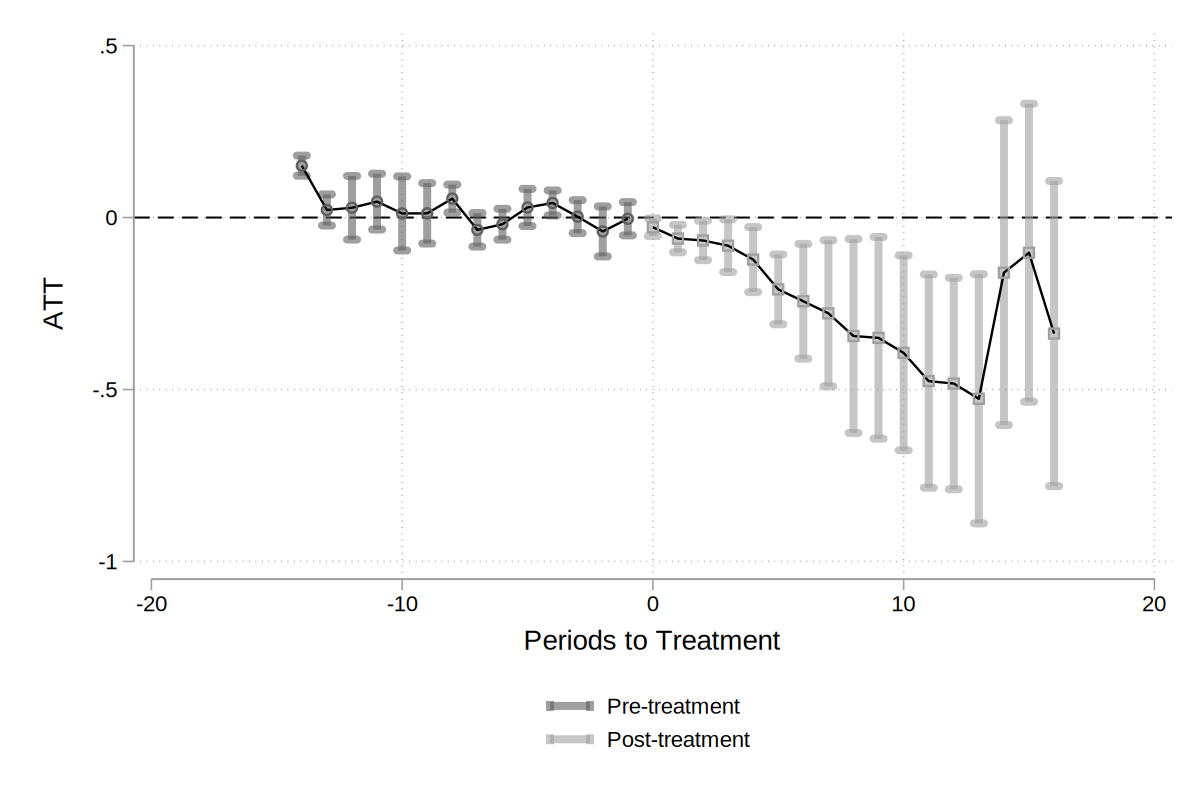

In [31]:
 csdid_estat event,
csdid_plot, style(rcap)
graph display, scheme(plotplain)

In [34]:
        csdid lnWhite_app  lnpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(dripw) agg(simple) notyet long

. csdid lnWhite_app  lnpop*, ivar(unitid) time(year) gvar(gvar)         method(
> dripw) agg(simple) notyet long
Units always treated found. These will be ignored
Panel is not balanced
Will use observations with Pair balanced (observed at t0 and t1)
..................................................
.......xxx........................................
..................................................
........................................
Difference-in-difference with Multiple Time Periods

                                                           Number of obs = 471
Outcome model  : least squares
Treatment model: inverse probability
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         ATT |  -.1908083   .0593076    -3.22   0.001    -.3070489   -.0745676
----------------------------------------


ATT by Periods Before and After treatment
Event Study:Dynamic effects
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     Pre_avg |   -.037788   .0537295    -0.70   0.482    -.1430959    .0675199
    Post_avg |  -.2616744   .0829203    -3.16   0.002    -.4241952   -.0991536
        Tm13 |   .1050842   .1184738     0.89   0.375    -.1271202    .3372886
        Tm12 |   .0439926   .1135004     0.39   0.698    -.1784641    .2664493
        Tm11 |  -.0401186   .1428831    -0.28   0.779    -.3201643    .2399271
        Tm10 |   -.088707   .1181435    -0.75   0.453    -.3202641    .1428501
         Tm9 |  -.0958861   .0732185    -1.31   0.190    -.2393918    .0476195
         Tm8 |  -.0487861   .0715944    -0.68   0.496    -.1891085    .0915362
         Tm7 |  -.1061287    .071349    -1.49   0.137      -

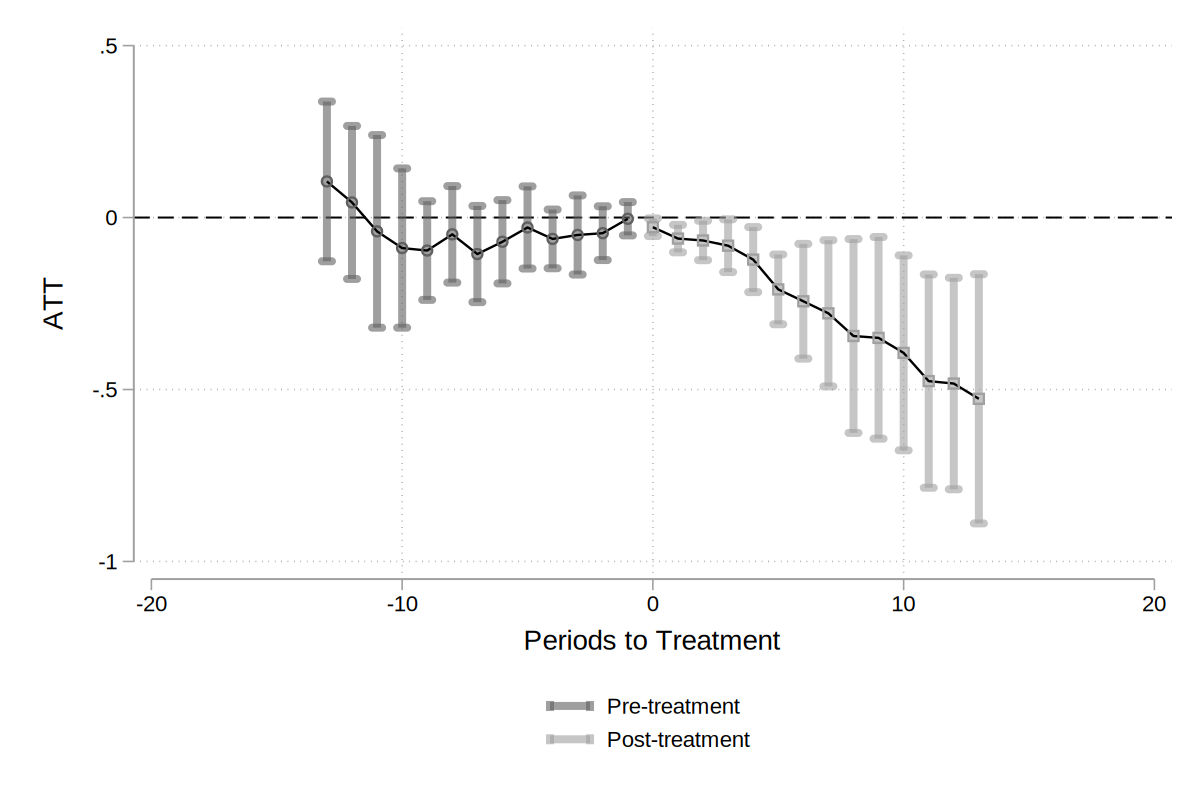

In [35]:
csdid_estat event, window(-13 13)
csdid_plot, style(rcap)
graph display, scheme(plotplain)

In [119]:
bysort unitid: egen minyear=min(year) if ftfefwhitt!=. & lnftfeftotlt!=.
bysort unitid: egen maxyear=max(year) if ftfefwhitt!=. & lnftfeftotlt!=.


(4 missing values generated)

(4 missing values generated)


In [120]:
bysort unitid: egen evertreat=max(hispserve)

In [121]:
gen missingpanel=.

(12,365 missing values generated)


In [122]:
sort unitid year
bysort unitid (year): replace missingpanel=1 if year[_n-1]!=year-1 | lnftfefwhitt==. | lnftfeftotlt==.



(827 real changes made)


In [123]:
replace missingpanel=. if year==2000 & lnftfefwhitt!=. & lnftfeftotlt!=.

(548 real changes made, 548 to missing)


In [124]:
bysort unitid: egen missingpanelall=min(missingpanel)

(10,535 missing values generated)


In [125]:
replace missingpanelall=1 if maxyear!=2019 | minyear !=2000

(535 real changes made)


In [126]:
drop if lnWhite_app==. & lnnonwhite_app==.
tab year if missingpanelall!=1


(11,732 observations deleted)


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2000 |         29        5.00        5.00
       2001 |         29        5.00       10.00
       2002 |         29        5.00       15.00
       2003 |         29        5.00       20.00
       2004 |         29        5.00       25.00
       2005 |         29        5.00       30.00
       2006 |         29        5.00       35.00
       2007 |         29        5.00       40.00
       2008 |         29        5.00       45.00
       2009 |         29        5.00       50.00
       2010 |         29        5.00       55.00
       2011 |         29        5.00       60.00
       2012 |         29        5.00       65.00
       2013 |         29        5.00       70.00
       2014 |         29        5.00       75.00
       2015 |         29        5.00       80.00
       2016 |         29        5.00       85.00
       2017 |         29        5.00

In [134]:
list unitid instnm year pcttefhispt if switcher==1 & pcttefhispt<25


     +---------------------------------------------------------------------------+
     | unitid                                           instnm   year   pctte~pt |
     |---------------------------------------------------------------------------|
 43. | 110495           CALIFORNIA STATE UNIVERSITY-STANISLAUS   2002   24.55105 |
 44. | 110495           CALIFORNIA STATE UNIVERSITY-STANISLAUS   2003   24.70673 |
 81. | 110529   CALIFORNIA STATE POLYTECHNIC UNIVERSITY-POMONA   2000    22.2111 |
 82. | 110529   CALIFORNIA STATE POLYTECHNIC UNIVERSITY-POMONA   2001   22.36966 |
 83. | 110529   CALIFORNIA STATE POLYTECHNIC UNIVERSITY-POMONA   2002    22.4723 |
     |---------------------------------------------------------------------------|
 84. | 110529   CALIFORNIA STATE POLYTECHNIC UNIVERSITY-POMONA   2003   23.38649 |
101. | 110538                CALIFORNIA STATE UNIVERSITY-CHICO   2000   9.562102 |
102. | 110538                CALIFORNIA STATE UNIVERSITY-CHICO   2001   9.910385 |
103

In [132]:
list unitid instnm year pcttefhispt if unitid==110422


     +------------------------------------------------------------------------------------+
     | unitid                                                    instnm   year   pctte~pt |
     |------------------------------------------------------------------------------------|
  1. | 110422         CALIFORNIA POLYTECHNIC STATE UNIV-SAN LUIS OBISPO   2000   10.72996 |
  2. | 110422         CALIFORNIA POLYTECHNIC STATE UNIV-SAN LUIS OBISPO   2001   10.31426 |
  3. | 110422         CALIFORNIA POLYTECHNIC STATE UNIV-SAN LUIS OBISPO   2002   9.296285 |
  4. | 110422         CALIFORNIA POLYTECHNIC STATE UNIV-SAN LUIS OBISPO   2003   9.460116 |
  5. | 110422   CALIFORNIA POLYTECHNIC STATE UNIVERSITY-SAN LUIS OBISPO   2004   9.573998 |
     |------------------------------------------------------------------------------------|
  6. | 110422   California Polytechnic State University-San Luis Obispo   2005   9.766377 |
  7. | 110422   California Polytechnic State University-San Luis Obispo   2006 

In [185]:
** Public schools, Y is logged
    foreach nam in White_app nonwhite_app {
        
        qui eststo Swdiff`nam': reghdfe ln`nam' afteryrs beforeafteryrs lntot_app lnftfeftotlt lncpop* lncpop* ///
         if switchers==1 , absorb(unitid) cluster(unitid)

        qui eststo counterdiff`nam': reghdfe ln`nam' afteryrs beforeafteryrs lntot_app lnftfeftotlt lncpop* lnpop*  ///
        if pcttefhispt>15, absorb(unitid) cluster(unitid)
        
        qui eststo NSwdiff`nam': reghdfe ln`nam' afteryrs beforeafteryrs lntot_app lnftfeftotlt lncpop* lnpop*  ///
         , absorb(unitid) cluster(unitid)
        
        qui eststo pcdid`nam': pcdid ln`nam' evertreat hispserve lntot_app lnftfeftotlt lncpop* lnpop* if missingpanelall!=1, alpha fp(3)
    
        qui eststo csdid`nam': csdid ln`nam' lntot_app lnftfeftotlt lncpop*  lnpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(dripw) agg(simple) notyet long


esttab Swdiff`nam' counterdiff`nam' NSwdiff`nam' pcdid`nam' csdid`nam'`control', star(* .05 ** .01 *** .001) ///
        stats(r2_a_within N_clust N, fmt(2 %9.0fc %9.0fc) label("r2" "schools" "N")) ///
        keep(afteryrs beforeafteryrs hispserve ATT ) se(%9.3fc) b(%9.3fc) ///
        label mtitle("Switchers" "Counterfactual" "All" "PC DiD" "DR DiD" "NN Matching") ///
        nonotes modelwidth(10)
}


Panel is not balanced
Will use observations with Pair balanced (observed at t0 and t1)

------------------------------------------------------------------------------------------
                            (1)           (2)           (3)           (4)           (5)   
                      Switchers    Counterf~l           All        PC DiD        DR DiD   
------------------------------------------------------------------------------------------
after years              -0.015*       -0.016        -0.015*                              
                        (0.007)       (0.010)       (0.007)                               

before and after y~s     -0.038***     -0.002        -0.006                               
                        (0.008)       (0.008)       (0.005)                               

hispserve                                                           0.006                 
                                                                  (0.024)                 

In [54]:
esttab SwdiffWhite_app counterdiffWhite_app NSwdiffWhite_app pcdidWhite_app csdidWhite_app, star(* .05 ** .01 *** .001) ///
        stats(r2_a_within N_clust N neqr Ne Nc nobs, fmt(2 %9.0fc %9.0fc) label("r2" "schools" "N" "Always HSI" "HSI switchers" "Control Schools" "N")) ///
        keep(afteryrs beforeafteryrs hispserve ATT ) se(%9.3fc) b(%9.3fc) ///
        label mtitle("Switchers" "Counterfactual" "All" "PC DiD" "DR DiD" "NN Matching") ///
        nonotes modelwidth(10)

. esttab SwdiffWhite_app counterdiffWhite_app NSwdiffWhite_app pcdidWhite_app c
> sdidWhite_app, star(* .05 ** .01 *** .001)         stats(r2_a_within N_clust 
> N neqr Ne Nc nobs, fmt(2 %9.0fc %9.0fc) label("r2" "schools" "N" "Always HSI"
>  "HSI switchers" "Control Schools" "N"))         keep(afteryrs beforeafteryrs
>  hispserve ATT ) se(%9.3fc) b(%9.3fc)         label mtitle("Switchers" "Count
> erfactual" "All" "PC DiD" "DR DiD" "NN Matching")         nonotes modelwidth(
> 10)

------------------------------------------------------------------------------------------
                            (1)           (2)           (3)           (4)           (5)   
                      Switchers    Counterf~l           All        PC DiD        DR DiD   
------------------------------------------------------------------------------------------
after years              -0.022**      -0.027***     -0.023***                            
                        (0.006)       (0.007)       (0.006

In [42]:
tab hispserve if year==2000


  hispserve |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         21       72.41       72.41
          1 |          8       27.59      100.00
------------+-----------------------------------
      Total |         29      100.00


In [ ]:
set more off
csdid lnWhite_app afteryears lntot_app lnftfeftotlt lncpop* lnpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(dripw) agg(event) notyet 

In [83]:
estat event, window(-5 5)

ATT by Periods Before and After treatment
Event Study:Dynamic effects
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     Pre_avg |   .0688509   .0282395     2.44   0.015     .0135024    .1241993
    Post_avg |  -.1082342   .0389981    -2.78   0.006    -.1846691   -.0317993
         Tm5 |  -.0243697   .0120852    -2.02   0.044    -.0480563    -.000683
         Tm4 |   .1653007   .0531272     3.11   0.002     .0611734    .2694281
         Tm3 |   .0213378   .0840702     0.25   0.800    -.1434367    .1861123
         Tm2 |  -.0257259   .0553303    -0.46   0.642    -.1341714    .0827195
         Tm1 |   .2077114    .115036     1.81   0.071    -.0177551    .4331779
         Tp0 |  -.0363153   .0242008    -1.50   0.133     -.083748    .0111174
         Tp1 |  -.0860154   .0315011    -2.73   0.006    -.14

In [71]:
csdid lnWhite_app lntot_app lnftfeftotlt lncpop* lnpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(dripw) agg(calendar) notyet long

. csdid lnWhite_app lntot_app lnftfeftotlt lncpop* lnpop*, ivar(unitid) time(ye
> ar) gvar(gvar)         method(dripw) agg(calendar) notyet long
Units always treated found. These will be ignored
Panel is not balanced
Will use observations with Pair balanced (observed at t0 and t1)
...................xxxxxxxxxxxxxxxxxxx........x...
.......xxx................x.......................
x.............xxxxxxxxx.xxxxxxxxx.................
...........................xx...........
Difference-in-difference with Multiple Time Periods

                                                           Number of obs = 444
Outcome model  : least squares
Treatment model: inverse probability
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
    CAverage |  -.1621868   .0642135    -2.53   0.012    -.2880429   -.0363307
       T

In [100]:
qui csdid lnWhite_app lntot_app lnftfeftotlt lncpop* lnpop* if gvar!=2009 & gvar!=2015 & gvar!=2013 & gvar!=2003, ivar(unitid) time(year) gvar(gvar) ///
        method(dripw) notyet long 


Panel is not balanced
Will use observations with Pair balanced (observed at t0 and t1)


In [101]:
estat group

ATT by group
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
    GAverage |  -.1901303   .0401488    -4.74   0.000    -.2688206     -.11144
       G2006 |  -.6438457   .1599307    -4.03   0.000    -.9573041   -.3303874
       G2007 |    .081081   .0814042     1.00   0.319    -.0784683    .2406303
       G2010 |  -.0189331   .0116506    -1.63   0.104    -.0417679    .0039017
       G2014 |  -.1112279   .0358871    -3.10   0.002    -.1815653   -.0408904
------------------------------------------------------------------------------


In [27]:
tab year


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2000 |         30        4.74        4.74
       2001 |         30        4.74        9.48
       2002 |         31        4.90       14.38
       2003 |         31        4.90       19.27
       2004 |         31        4.90       24.17
       2005 |         32        5.06       29.23
       2006 |         32        5.06       34.28
       2007 |         32        5.06       39.34
       2008 |         32        5.06       44.39
       2009 |         32        5.06       49.45
       2010 |         32        5.06       54.50
       2011 |         32        5.06       59.56
       2012 |         32        5.06       64.61
       2013 |         32        5.06       69.67
       2014 |         32        5.06       74.72
       2015 |         32        5.06       79.78
       2016 |         32        5.06       84.83
       2017 |         32        5.06       89.89
       2018 |      

In [105]:
tab gvar


      Group |
   Variable |
   based on |
  hispserve |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        119       18.86       18.86
       2000 |        160       25.36       44.22
       2003 |         20        3.17       47.39
       2004 |         20        3.17       50.55
       2006 |         55        8.72       59.27
       2007 |         17        2.69       61.97
       2009 |         20        3.17       65.13
       2010 |         20        3.17       68.30
       2012 |         20        3.17       71.47
       2013 |         60        9.51       80.98
       2014 |        100       15.85       96.83
       2015 |         20        3.17      100.00
------------+-----------------------------------
      Total |        631      100.00


In [107]:
tab hispserve if year==2000 & missingpanelall!=1


  hispserve |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         21       72.41       72.41
          1 |          8       27.59      100.00
------------+-----------------------------------
      Total |         29      100.00


In [112]:
gen evertreat2014=evertreat==1 & gvar<2014 & gvar>2000 if

In [215]:
gen csu=csuadmit==3

In [218]:
gen csuXcpopwhite=csu*lncpopwh

(2 missing values generated)


In [223]:
list instnm year pcttefhispt if evertreat==0 & year==2019


     +---------------------------------------------------------------------------+
     |                                                  instnm   year   pctte~pt |
     |---------------------------------------------------------------------------|
 20. | California Polytechnic State University-San Luis Obispo   2019   17.55144 |
300. |                       University of California-Berkeley   2019   15.62802 |
320. |                          University of California-Davis   2019   23.23755 |
360. |                    University of California-Los Angeles   2019   22.50961 |
400. |                      University of California-San Diego   2019   21.88814 |
     |---------------------------------------------------------------------------|
460. |            California State University Maritime Academy   2019   21.95946 |
     +---------------------------------------------------------------------------+


In [127]:
gen newid=unitid
keep if missingpanelall!=1
drop if gvar==2000



(53 observations deleted)

(160 observations deleted)


In [128]:
tsset newid year


Panel variable: newid (strongly balanced)
 Time variable: year, 2000 to 2019
         Delta: 1 unit


In [21]:
keep if missingpanelall!=1 & gvar!=2000

(213 observations deleted)


In [58]:
pcdid lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop*, alpha pdall

. pcdid lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop*, a
> lpha pdall

PCDID: Principal    Components              Number of obs           =      420
       Diff-in-Diff Regression              Number of groups        =       21
      (by CK, *PCDID Approach*)             (Treated =      16)
                                            (Control =       5)
                                            Obs per group           =       20
Method: Mean-Group (PCDID-MG)               Number of factors used  =        2

--------------------------------------------------------------------------------
   lnWhite_app | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
---------------+----------------------------------------------------------------
      afteryrs |  -.0257587   .0176339    -1.46   0.144    -.0603206    .0088031
     lntot_app |   .9945216   .1104201     9.01   0.000     .7781022    1.210941
  lnftfeftotlt |     .07014   .0349113     2.01   0.045 

In [59]:
ereturn list


scalars:
                 e(Ne) =  16
                 e(Nc) =  5
                  e(T) =  20
                e(NeT) =  320
                e(NcT) =  100
               e(nobs) =  420
            e(factnum) =  2
           e(factnum0) =  1
           e(factnum1) =  1
          e(alphastat) =  .0003405722701459
        e(alphastatse) =  .2116640568637553
         e(alphastatz) =  -4.722858677764636
         e(alphastatp) =  2.32552453094e-06
               e(kmax) =  10
       e(treatlistnum) =  0

macros:
             e(indeps) : " afteryrs lntot_app lnftfeftotlt lncpopam lncpopas lncpopbl lncpopwh lncpophi lnpopulationam lnpopulationas lnpopulation.."
           e(treatvar) : "evertreat"
             e(depvar) : "lnWhite_app"
               e(time) : "year"
                 e(id) : "newid"
                e(cmd) : "pcdid"
         e(properties) : "b V"

matrices:
                  e(b) :  1 x 16
                  e(V) :  16 x 16
               e(matc) :  5 x 16
               e(matb

In [64]:
** coefficients by treated units
matrix list matb


matb[16,16]
         afteryrs     lntot_app  lnftfeftotlt      lncpopam      lncpopas      lncpopbl      lncpopwh      lncpophi  lnpopulati~m  lnpopulati~s
 r1    -.12850948     1.3401968     .17274795    -.95691021      1.319326    -1.4673664    -6.8344591        8.9868     -7.858406    -1.7206677
 r2    -.05731552      .8596325    -.08796247    -.14906233    -1.1303198    -.76656227     .02311074     1.0811329    -1.7214673     2.5182611
 r3    -.00916634     .96557845     .04290295     1.4570937     2.9887943     .29534568    -1.0104965     .08157646    -3.6130358    -4.1836851
 r4    -.11364745     .56611714      .2338726    -.35532778    -.87490579     3.1458761    -4.0067254     1.2115699     -3.919779     .45770623
 r5     .00535083     .51651762     .01838024     1.6692224     .98032405     -.5008559    -5.9022578    -4.3712989    -5.8732551    -.42240802
 r6    -.06624323     1.0398901    -.07028655      .5815429     1.8238364    -1.1347498    -4.9091833    -9.9208995    -6.7

In [ ]:
matrix list

In [60]:
matrix list e(b)


e(b)[1,16]
        afteryrs     lntot_app  lnftfeftotlt      lncpopam      lncpopas      lncpopbl      lncpopwh      lncpophi  lnpopulati~m  lnpopulati~s
y1    -.02575872     .99452157     .07013997    -.02271022     .38426763    -.45011097    -1.3810698     .01552536    -2.8711023      .1984141

    lnpopulati~l  lnpopulati~i  lnpopulati~h       fproxy1       fproxy2         _cons
y1    -2.1744627      .3438144     5.7971878    -1.4350923     3.0375355    -20.265406


In [61]:
matrix list e(V)


symmetric e(V)[16,16]
                  afteryrs     lntot_app  lnftfeftotlt      lncpopam      lncpopas      lncpopbl      lncpopwh      lncpophi  lnpopulati~m
    afteryrs     .00031096
   lntot_app             0      .0121926
lnftfeftotlt             0             0      .0012188
    lncpopam             0             0             0     .04034774
    lncpopas             0             0             0             0     .38185016
    lncpopbl             0             0             0             0             0     .09507925
    lncpopwh             0             0             0             0             0             0      .4969101
    lncpophi             0             0             0             0             0             0             0     1.0524157
lnpopulati~m             0             0             0             0             0             0             0             0     .55903627
lnpopulati~s             0             0             0             0             0         

In [ ]:
ycresidmean

In [32]:
gen newid=unitid
tsset newid year




Panel variable: newid (strongly balanced)
 Time variable: year, 2000 to 2019
         Delta: 1 unit


In [68]:
merge m:1 year using fproxy.dta, nogen
ds



    Result                      Number of obs
    -----------------------------------------
    Not matched                             0
    Matched                               420  
    -----------------------------------------

unitid        ftfefaiant    cpopam        pcttefaiant   lnpopulati~l  campus_id     Blank_app     Asian_enroll  ucadmit       newid
instnm        ftfefasiat    cpopas        lnftfefaiant  lnpopulati~i  tot_apply     AfricanAm_~t  Latinx_enr~l  nonwhite_app  ycresidmean
control       ftfefhispt    cpopbl        lntefaiant    lnpopulati~h  tot_admit     AmInd_admit   White_enroll  lnWhite_app   fproxy1
year          ftfefwhitt    cpopwh        pcttefasiat   lnftfeftotlt  tot_enroll    Asian_admit   PacIsland_~l  lnnonwhite~p  fproxy2
fips          ftfeftotlt    pcttefbkaat   lnftfefasiat  hispserve     AfricanAm_~p  Latinx_admit  Unknown_en~l  lntot_app     fproxy3
tefbkaat      ftfef2mort    lnftfefbkaat  lntefasiat    transition    AmInd_app     White_adm

In [71]:
bootstrap, rep(999) seed(123) cluster(unitid) idcluster(newid): regress yhat evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1 fproxy2, cluster(unitid)

. bootstrap, rep(999) seed(123) cluster(unitid) idcluster(newid): regress yhat 
> evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1 fproxy2, clu
> ster(unitid)
(running regress on estimation sample)

Bootstrap replications (999)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
...x..............................................    50
...............x..................................   100
.x................................................   150
..................................................   200
..................................................   250
.......x..........................................   300
..................................................   350
..................................................   400
..................................................   450
..................................................   500
..................................................   550
..................................................   600
....................

In [72]:
bootstrap, rep(999) seed(123) cluster(unitid) idcluster(newid): regress yhat afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1 fproxy2 if evertreat==1, cluster(unitid)

. bootstrap, rep(999) seed(123) cluster(unitid) idcluster(newid): regress yhat 
> afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1 fproxy2 if evertreat==
> 1, cluster(unitid)
(running regress on estimation sample)

Bootstrap replications (999)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
..................................................    50
..................................................   100
..................................................   150
..................................................   200
..................................................   250
..................................................   300
..................................................   350
..................................................   400
..................................................   450
..................................................   500
..................................................   550
..................................................   600
..............

In [48]:
reg yhat afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1 fproxy2, cluster(unitid)

. reg yhat afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1 fproxy2, clus
> ter(unitid)

Linear regression                               Number of obs     =        420
                                                F(15, 20)         =     340.50
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9393
                                                Root MSE          =     .18258

                                  (Std. err. adjusted for 21 clusters in unitid)
--------------------------------------------------------------------------------
               |               Robust
          yhat | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
---------------+----------------------------------------------------------------
      afteryrs |  -.0262388   .0107163    -2.45   0.024    -.0485926    -.003885
     lntot_app |   1.106595   .0821129    13.48   0.000     .93531

In [73]:
regress yhat evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1 fproxy2 , cluster(unitid)

. regress yhat evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1
>  fproxy2 , cluster(unitid)

Linear regression                               Number of obs     =        420
                                                F(16, 20)         =     395.19
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9403
                                                Root MSE          =     .18135

                                  (Std. err. adjusted for 21 clusters in unitid)
--------------------------------------------------------------------------------
               |               Robust
          yhat | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
---------------+----------------------------------------------------------------
     evertreat |  -.0726883   .0910283    -0.80   0.434    -.2625701    .1171934
      afteryrs |  -.0240708   .0105655    -2.28   0

In [99]:
display 2

2


In [104]:
display (0.008517-0.05396)/2

-.0227215


In [75]:
ereturn list


scalars:
            e(N_clust) =  21
                  e(N) =  420
               e(df_m) =  16
               e(df_r) =  20
                  e(F) =  395.1889625510337
                 e(r2) =  .9402591876016408
               e(rmse) =  .1813463491671704
                e(mss) =  208.5927172298245
                e(rss) =  13.2532588375733
               e(r2_a) =  .9378873439332196
                 e(ll) =  129.8081762609205
               e(ll_0) =  -461.9171958900161
               e(rank) =  17

macros:
            e(cmdline) : "regress yhat evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1 fproxy2 , cluster(unitid)"
              e(title) : "Linear regression"
          e(marginsok) : "XB default"
                e(vce) : "cluster"
             e(depvar) : "yhat"
                e(cmd) : "regress"
         e(properties) : "b V"
            e(predict) : "regres_p"
              e(model) : "ols"
          e(estat_cmd) : "regress_estat"
            e(vcetype) : "Ro


    Result                      Number of obs
    -----------------------------------------
    Not matched                             0
    Matched                               420  
    -----------------------------------------


In [109]:
pcdid lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop*, alpha 
merge m:1 year using fproxy.dta, nogen
 boottest afteryrs, statistic(t) cluster(unitid) seed(123)



PCDID: Principal    Components              Number of obs           =      420
       Diff-in-Diff Regression              Number of groups        =       21
      (by CK, *PCDID Approach*)             (Treated =      16)
                                            (Control =       5)
                                            Obs per group           =       20
Method: Mean-Group (PCDID-MG)               Number of factors used  =        2

--------------------------------------------------------------------------------
   lnWhite_app | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
---------------+----------------------------------------------------------------
      afteryrs |  -.0257587   .0176339    -1.46   0.144    -.0603206    .0088031
     lntot_app |   .9945216   .1104201     9.01   0.000     .7781022    1.210941
  lnftfeftotlt |     .07014   .0349113     2.01   0.045     .0017151    .1385649
      lncpopam |  -.0227102   .2008675    -0.11   0.910    -.416403

In [92]:
return list


scalars:
               r(NH0s) =  1
               r(reps) =  999
               r(null) =  1
               r(ptol) =  1.00000000000e-06
              r(level) =  95
                  r(p) =  .1281281281281281
                 r(df) =  1
               r(chi2) =  6.528607420195645
                  r(z) =  -2.555113974012832

macros:
          r(clustvars) : "unitid"
           r(boottype) : "wild"
         r(weighttype) : "rademacher"
          r(statistic) : "t"
             r(robust) : "robust"
              r(CIstr) : "[−.05396, .008517]"
               r(seed) : "XAA9e9622488c07818d35a5a90ec28978a5664c4a2fa7cffc1feccaaf81dda18167cd0927ede20f64c6df5523d1710f636b88548498e78c90d531110.."

matrices:
                 r(CI) :  1 x 2
               r(peak) :  1 x 2
               r(plot) :  25 x 2
                  r(V) :  1 x 1
                  r(b) :  1 x 1


In [91]:
ereturn list


scalars:
       e(treatlistnum) =  0
               e(kmax) =  10
         e(alphastatp) =  2.32552453094e-06
         e(alphastatz) =  -4.722858677764636
        e(alphastatse) =  .2116640568637553
          e(alphastat) =  .0003405722701459
           e(factnum1) =  1
           e(factnum0) =  1
            e(factnum) =  2
               e(nobs) =  420
                e(NcT) =  100
                e(NeT) =  320
                  e(T) =  20
                 e(Nc) =  5
                 e(Ne) =  16

macros:
             e(indeps) : " afteryrs lntot_app lnftfeftotlt lncpopam lncpopas lncpopbl lncpopwh lncpophi lnpopulationam lnpopulationas lnpopulation.."
           e(treatvar) : "evertreat"
             e(depvar) : "lnWhite_app"
               e(time) : "year"
                 e(id) : "newid"
                e(cmd) : "pcdid"
         e(properties) : "b V"

matrices:
                  e(b) :  1 x 16
                  e(V) :  16 x 16
               e(matc) :  5 x 16
               e(matb

In [45]:
regress yhat evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1 fproxy2 , cluster(unitid)
 boottest afteryrs, statistic(t) cluster(unitid)



Linear regression                               Number of obs     =        420
                                                F(16, 20)         =     395.19
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9403
                                                Root MSE          =     .18135

                                  (Std. err. adjusted for 21 clusters in unitid)
--------------------------------------------------------------------------------
               |               Robust
          yhat | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
---------------+----------------------------------------------------------------
     evertreat |  -.0726883   .0910283    -0.80   0.434    -.2625701    .1171934
      afteryrs |  -.0240708   .0105655    -2.28   0.034    -.0461101   -.0020315
     lntot_app |    1.06416   .0912237    11.67   0.000     .8738703    1.2544

In [31]:
regress yhat evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop*, cluster(unitid)
 boottest afteryrs, statistic(t) cluster(unitid)



Linear regression                               Number of obs     =        420
                                                F(14, 20)         =     286.33
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9402
                                                Root MSE          =     .18106

                                  (Std. err. adjusted for 21 clusters in unitid)
--------------------------------------------------------------------------------
               |               Robust
          yhat | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
---------------+----------------------------------------------------------------
     evertreat |   -.073238   .0907398    -0.81   0.429    -.2625179     .116042
      afteryrs |  -.0241173   .0105421    -2.29   0.033    -.0461077   -.0021269
     lntot_app |   1.062895   .0907385    11.71   0.000     .8736173    1.2521

In [26]:
drop yhat yhat_afteryrs
pdd yhat
gen yhat_afteryrs = yhat / afteryr
sum yhat_afteryrs



(WARNING: if you used an IF clause in estimation to select id's,     
          the predictions generated by pdd will be unstable.)
Predictions generated.

(290 missing values generated)


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
yhat_after~s |        130    2.840816    2.494938   .5441192   9.802603


In [53]:
ereturn list


scalars:
            e(N_clust) =  21
                  e(N) =  420
               e(df_m) =  15
               e(df_r) =  20
                  e(F) =  340.5045209680487
                 e(r2) =  .9392963338676749
               e(rmse) =  .182575523936211
                e(mss) =  208.3791120034027
                e(rss) =  13.46686406399511
               e(r2_a) =  .9370424848776133
                 e(ll) =  126.4505529963997
               e(ll_0) =  -461.9171958900161
               e(rank) =  16

macros:
            e(cmdline) : "regress yhat afteryrs lntot_app lnftfeftotlt lncpop* lnpop* fproxy1 fproxy2, cluster(unitid)"
              e(title) : "Linear regression"
          e(marginsok) : "XB default"
                e(vce) : "cluster"
             e(depvar) : "yhat"
                e(cmd) : "regress"
         e(properties) : "b V"
            e(predict) : "regres_p"
              e(model) : "ols"
          e(estat_cmd) : "regress_estat"
            e(vcetype) : "Robust"
     

In [57]:
ereturn 

global macro $e not found


r(111);


In [55]:
matrix list e(b)


e(b)[1,16]
        afteryrs     lntot_app  lnftfeftotlt      lncpopam      lncpopas      lncpopbl      lncpopwh      lncpophi  lnpopulati~m  lnpopulati~s
y1    -.02623878      1.106595    -.01234141      -.166776     -.3015618     .06159909     .65027114    -.21934391    -1.8328528     .05786515

    lnpopulati~l  lnpopulati~i  lnpopulati~h       fproxy1       fproxy2         _cons
y1    -1.2917931    -.83795917     3.4874805    -1.7138346     4.6011597    -6.7436691


In [54]:
matrix list matb


matb[16,16]
         afteryrs     lntot_app  lnftfeftotlt      lncpopam      lncpopas      lncpopbl      lncpopwh      lncpophi  lnpopulati~m  lnpopulati~s
 r1    -.12850948     1.3401968     .17274795    -.95691021      1.319326    -1.4673664    -6.8344591        8.9868     -7.858406    -1.7206677
 r2    -.05731552      .8596325    -.08796247    -.14906233    -1.1303198    -.76656227     .02311074     1.0811329    -1.7214673     2.5182611
 r3    -.00916634     .96557845     .04290295     1.4570937     2.9887943     .29534568    -1.0104965     .08157646    -3.6130358    -4.1836851
 r4    -.11364745     .56611714      .2338726    -.35532778    -.87490579     3.1458761    -4.0067254     1.2115699     -3.919779     .45770623
 r5     .00535083     .51651762     .01838024     1.6692224     .98032405     -.5008559    -5.9022578    -4.3712989    -5.8732551    -.42240802
 r6    -.06624323     1.0398901    -.07028655      .5815429     1.8238364    -1.1347498    -4.9091833    -9.9208995    -6.7

In [130]:
bootstrap, rep(10) seed(123) cluster(unitid) idcluster(newid): pcdid lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop*, alpha 

. bootstrap, rep(10) seed(123) cluster(unitid) idcluster(newid): pcdid lnWhite_
> app evertreat afteryrs lntot_app lnftfeftotlt lncpop* lnpop*, alpha
(running pcdid on estimation sample)

         exclude observations, press Break, save the data, drop any observations that are to be excluded, and rerun bootstrap.

Bootstrap replications (10)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
.xxx......
varlist required


r(100);


In [131]:
bootstrap: pcdid lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lnpopulation* lncpop*, alpha

. bootstrap: pcdid lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lnpopu
> lation* lncpop*, alpha
(running pcdid on estimation sample)

         exclude observations, press Break, save the data, drop any observations that are to be excluded, and rerun bootstrap.

Bootstrap replications (50)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx    50
insufficient observations to compute bootstrap standard errors
no results will be saved


r(2000);


In [124]:
ereturn matrix mat b matb

matrix e(matb)matb)


In [120]:
ereturn list


scalars:
                 e(Ne) =  16
                 e(Nc) =  5
                  e(T) =  20
                e(NeT) =  320
                e(NcT) =  100
               e(nobs) =  420
            e(factnum) =  2
           e(factnum0) =  1
           e(factnum1) =  1
          e(alphastat) =  .0003405722701675
        e(alphastatse) =  .2116640568637396
         e(alphastatz) =  -4.722858677764885
         e(alphastatp) =  2.32552453094e-06
               e(kmax) =  10
       e(treatlistnum) =  0

macros:
             e(indeps) : " afteryrs lntot_app lnftfeftotlt lnpopulationam lnpopulationas lnpopulationbl lnpopulationhi lnpopulationwh lncpopam lnc.."
           e(treatvar) : "evertreat"
             e(depvar) : "lnWhite_app"
               e(time) : "year"
                 e(id) : "unitid"
                e(cmd) : "pcdid"
         e(properties) : "b V"

matrices:
                  e(b) :  1 x 16
                  e(V) :  16 x 16
               e(matc) :  5 x 16
               e(mat

matrix V_modelbased not found


r(111);


In [85]:
qui reg lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lnpopulation* lncpop*

In [86]:
ereturn list


scalars:
                  e(N) =  420
               e(df_m) =  14
               e(df_r) =  405
                  e(F) =  452.4796730444751
                 e(r2) =  .9399084420329425
               e(rmse) =  .1814519700035881
                e(mss) =  208.569348685999
                e(rss) =  13.33455105436413
               e(r2_a) =  .937831202992106
                 e(ll) =  128.5240224481875
               e(ll_0) =  -461.972019438393
               e(rank) =  15

macros:
            e(cmdline) : "regress lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lnpopulation* lncpop*"
              e(title) : "Linear regression"
          e(marginsok) : "XB default"
                e(vce) : "ols"
             e(depvar) : "lnWhite_app"
                e(cmd) : "regress"
         e(properties) : "b V"
            e(predict) : "regres_p"
              e(model) : "ols"
          e(estat_cmd) : "regress_estat"

matrices:
                  e(b) :  1 x 15
                  e(V) :  15 x 

In [71]:
describe


Contains data from fproxy.dta
 Observations:            20                  
    Variables:             7                  30 Jan 2023 15:41
------------------------------------------------------------------------------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
------------------------------------------------------------------------------------------------------------------------------------------------------
year            float   %9.0g                 year
fproxy1         float   %9.0g                 
fproxy2         float   %9.0g                 
fproxy3         float   %9.0g                 
fproxy4         float   %9.0g                 
fproxy5         float   %9.0g                 
ycresidmean     float   %9.0g                 (mean) ycresid
-----------------------------------------------------------------------------------------------------------

In [20]:
qui xtreg lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lnpopulation* lncpop*, cluster(unitid)
boottest afteryrs



Doesn't work after {xtreg, re}.


r(198);
r(198);


In [43]:
help pcdid



Title
-----

    pcdid -- Principal components difference-in-differences


Description
-----------

    pcdid implements factor-augmented difference-in-differences (DID) estimation. It is useful in situations where the user suspects that trends may
    be unparallel and/or stochastic among control and treated units.  The data structure is similar to that in a DID setup. The estimation method is
    regression-based and can be considered as an extension of conventional DID regressions.

    pcdid also implements a parallel trend alpha test (based on an interactive effects structure) and a recursive procedure that determines the
    number of factors automatically.

    For further details, please see Chan and Kwok (2016, 2020) who developed the pcdid approach and the alpha test.


Quick start
-----------

    Consider the following list of variables in a long-form panel data set:

  variable                    Description
  -------------------------------------------------------------

In [38]:
bootstrap , rep(20) seed(123):  pcdid lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lnpopulation* lncpop*, alpha

. bootstrap , rep(20) seed(123):  pcdid lnWhite_app evertreat afteryrs lntot_ap
> p lnftfeftotlt lnpopulation* lncpop*, alpha
(running pcdid on estimation sample)

         exclude observations, press Break, save the data, drop any observations that are to be excluded, and rerun bootstrap.

Bootstrap replications (20)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
xxxxxxxxxxxxxxxxxxxx
insufficient observations to compute bootstrap standard errors
no results will be saved


r(2000);


In [37]:
bootstrap , rep(20) seed(123):  reg lnWhite_app evertreat afteryrs lntot_app lnftfeftotlt lnpopulation* lncpop* 

. bootstrap , rep(20) seed(123):  reg lnWhite_app evertreat afteryrs lntot_app 
> lnftfeftotlt lnpopulation* lncpop*
(running regress on estimation sample)

Bootstrap replications (20)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
....................

Linear regression                                     Number of obs =      420
                                                      Replications  =       20
                                                      Wald chi2(14) = 67849.42
                                                      Prob > chi2   =   0.0000
                                                      R-squared     =   0.9399
                                                      Adj R-squared =   0.9378
                                                      Root MSE      =   0.1815

--------------------------------------------------------------------------------
               |   Observed   Bootstrap                         Normal-based
   lnWhite_app | coefficient 

In [221]:
pcdid lnWhite_app evertreat hispserve lntot_app lnftfeftotlt lnpopulationwh lncpopwh ///
 if missingpanelall!=1 & gvar!=2000, alpha 

. pcdid lnWhite_app evertreat hispserve lntot_app lnftfeftotlt lnpopulationwh l
> ncpopwh  if missingpanelall!=1 & gvar!=2000, alpha

PCDID: Principal    Components              Number of obs           =      420
       Diff-in-Diff Regression              Number of groups        =       21
      (by CK, *PCDID Approach*)             (Treated =      16)
                                            (Control =       5)
                                            Obs per group           =       20
Method: Mean-Group (PCDID-MG)               Number of factors used  =        2

--------------------------------------------------------------------------------
   lnWhite_app | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
---------------+----------------------------------------------------------------
     hispserve |  -.0368262   .0237865    -1.55   0.122    -.0834469    .0097945
     lntot_app |   .7918717   .0658026    12.03   0.000      .662901    .9208424
  lnftfeftotlt |

In [222]:
pcdid lnWhite_app evertreat hispserve lntot_app lnftfeftotlt lnpopulation* lncpop* ///
 if missingpanelall!=1 & gvar!=2000, alpha 

. pcdid lnWhite_app evertreat hispserve lntot_app lnftfeftotlt lnpopulation* ln
> cpop*  if missingpanelall!=1 & gvar!=2000, alpha

PCDID: Principal    Components              Number of obs           =      420
       Diff-in-Diff Regression              Number of groups        =       21
      (by CK, *PCDID Approach*)             (Treated =      16)
                                            (Control =       5)
                                            Obs per group           =       20
Method: Mean-Group (PCDID-MG)               Number of factors used  =        2

--------------------------------------------------------------------------------
   lnWhite_app | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
---------------+----------------------------------------------------------------
     hispserve |   .0248027    .021793     1.14   0.255    -.0179108    .0675163
     lntot_app |    .988603   .1214635     8.14   0.000     .7505389    1.226667
  lnftfeftotlt |  

In [70]:
 pcdid lnftfefwhitt evertreat hispserve lntot_app lnftfeftotlt lncpop* lnpop* if missingpanelall!=1, alpha fp(3)
ereturn list



PCDID: Principal    Components              Number of obs           =      580
       Diff-in-Diff Regression              Number of groups        =       29
      (by CK, *PCDID Approach*)             (Treated =      24)
                                            (Control =       5)
                                            Obs per group           =       20
Method: Mean-Group (PCDID-MG)               Number of factors used  =        3

--------------------------------------------------------------------------------
  lnftfefwhitt | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
---------------+----------------------------------------------------------------
     hispserve |   -.015243   .0453077    -0.34   0.737    -.1040445    .0735585
     lntot_app |   .0970068   .1635153     0.59   0.553    -.2234774     .417491
  lnftfeftotlt |   .9434919   .0681626    13.84   0.000     .8098956    1.077088
      lncpopam |   -.810585     1.1667    -0.69   0.487    -3.09727

In [66]:
distinct unitid if e(sample)==1


        |        Observations
        |      total   distinct
--------+----------------------
 unitid |        444         24


In [68]:
local pcdid_schools1 = r(ndistinct)

In [69]:
display `pcdid_schools1'

24


In [47]:
tab gvar if lnWhite_app!=. & lnftfeftotlt!=.


      Group |
   Variable |
   based on |
  hispserve |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        119       18.86       18.86
       2000 |        160       25.36       44.22
       2003 |         20        3.17       47.39
       2004 |         20        3.17       50.55
       2006 |         55        8.72       59.27
       2007 |         17        2.69       61.97
       2009 |         20        3.17       65.13
       2010 |         20        3.17       68.30
       2012 |         20        3.17       71.47
       2013 |         60        9.51       80.98
       2014 |        100       15.85       96.83
       2015 |         20        3.17      100.00
------------+-----------------------------------
      Total |        631      100.00


In [46]:
display 631-160

471


In [53]:
tab hispserve if year==2005


  hispserve |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         22       68.75       68.75
          1 |         10       31.25      100.00
------------+-----------------------------------
      Total |         32      100.00


In [102]:
help pcdid



Title
-----

    pcdid -- Principal components difference-in-differences


Description
-----------

    pcdid implements factor-augmented difference-in-differences (DID) estimation. It is useful in
    situations where the user suspects that trends may be unparallel and/or stochastic among
    control and treated units.  The data structure is similar to that in a DID setup. The
    estimation method is regression-based and can be considered as an extension of conventional
    DID regressions.

    pcdid also implements a parallel trend alpha test (based on an interactive effects structure)
    and a recursive procedure that determines the number of factors automatically.

    For further details, please see Chan and Kwok (2016, 2020) who developed the pcdid approach
    and the alpha test.


Quick start
-----------

    Consider the following list of variables in a long-form panel data set:

  variable                    Description
  -------------------------------------------------